In [1]:
import pickle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma

import sys
sys.path.append("..")
from hiora_cartpole import interruptibility
from vividict import Vividict
import saveloaddata
import stats_experiments
import stats_experiments as se

/home/erle/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data_dir_p = "../data"

In [15]:
unintint = ['uninterrupted', 'interrupted']
def load_plot_all(algo, algo_sub, interr01, ax_el, ax_devel, ax_comp):
    with saveloaddata.load_res(algo + algo_sub, unintint[interr01], data_dir_p) as res:
        el = res[0]
        xs = interruptibility.rsxs2nparray(*res)
        
    se.plot_episode_lengths(el[:10], ax_el[interr01])
    se.plot_xss_cum_hist_devel(xs[:,:,:], ax_devel[interr01])
    before_cross = interruptibility.mask_after_cross(xs)
    se.plot_xs_hist(before_cross.flatten(), ax_comp[interr01])
    
    print "%10s %13s mean: %1.4f std: %1.4f" % (algo, unintint[interr01], np.mean(before_cross), np.std(before_cross))

# Further experiments

In the following panels you can see uninterrupted and interrupted Sarsa(λ) and Q-learning compared.

The line plot shows the development of rewards of the first ten training rounds for each case. You can see that they all train well.

The histograms show the proportions of time the cart spent in certain regions along the x-axis. For the uninterrupted case, timesteps after any crossing of 1.0 (until the end of the episode) are excluded in order to make it a better baseline to compare the interrupted case against.

The colourful plots on the right show the development of the histogram over time (y-axis). Imagine plotting the histogram (with 3d bars) after 500k, 1M, 1.5M, … etc. timesteps, arranging the results back to back, painting the top of the bar with a color indicating its height, and looking at the stacked histograms from above. This is to show that the histogram actually stabilizes.

## Comparison of uninterrupted and interrupted Sarsa(λ)

     Sarsa mean: -0.0682 std: 0.4535
     Sarsa mean: -0.1159 std: 0.3740


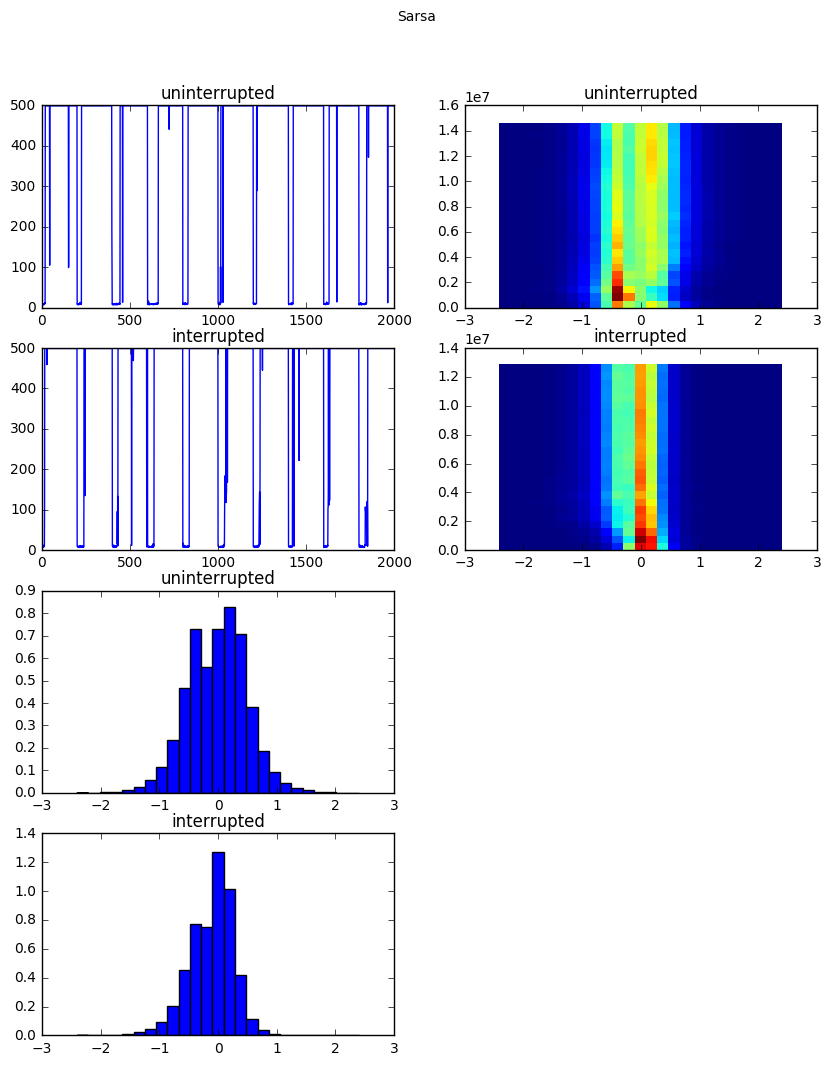

In [14]:
algo = 'Sarsa'
fig_axes = se.arrange_algo_full(algo)
load_plot_all(algo, '-rand-tiebreak', 0, *fig_axes[1:])
load_plot_all(algo, '-rand-tiebreak', 1, *fig_axes[1:])
fig_axes[0]

## Comparison of uninterrupted and interrupted Q-learning

In [13]:
algo = 'Q-learning'
fig_axes = se.arrange_algo_full(algo)
load_plot_all(algo, '-rand-tiebreak', 0, *fig_axes[1:])
load_plot_all(algo, '-rand-tiebreak', 1, *fig_axes[1:])
fig_axes[0]

ValueError: need at least one array to concatenate

In [27]:
algo = 'Sarsa'
fig, ax_el, ax_devel, ax_comp = se.arrange_algo_full(algo)

In [4]:
with saveloaddata.load_res('Sarsa-rand-tiebreak', 'uninterrupted', data_dir_p) as res:
    el = res[0]
    xs = interruptibility.rsxs2nparray(*res)

In [31]:
se.plot_episode_lengths(el[:10], ax_el[0])

In [35]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0])

In [28]:
se.plot_xss_cum_hist_devel(xs[:,:,:], ax_devel[1])

In [ ]:
se.plot_xs_hist(xs.flatten(), ax_comp[0])

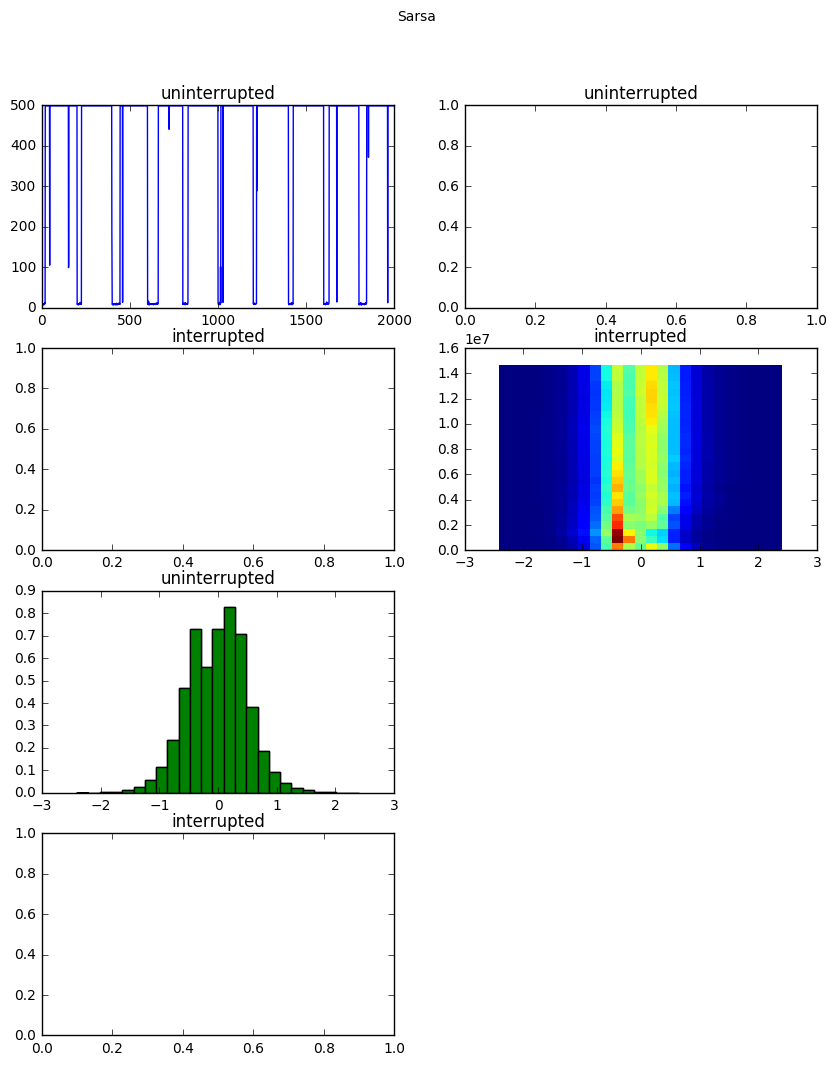

In [36]:
fig

In [54]:
p = '../data/Sarsa-disc-uninterrupted-xe-170221003432.pickle'
with open(p, 'rb') as f:
    res = pickle.load(f)
    
with open(p, 'wb') as f:
    pickle.dump(res[0:2], f)